In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
cols=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=cols)


In [3]:
df.head(3)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [4]:
df.shape

(100000, 4)

In [5]:
movies_names=pd.read_csv('u.item',sep ='\|',header=None)

In [6]:
movies_names.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movies_names=movies_names[[0,1]]

In [8]:
movies_names.head(3)

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [9]:
movies_names.columns=['item_id','Movie name']

In [10]:
movies_names.head()

,item_id,Movie name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
df=pd.merge(df,movies_names,on='item_id')

In [12]:
df.head()

,user_id,item_id,rating,timestamp,Movie name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [13]:
##EDA

In [14]:
df.groupby('Movie name').mean()['rating'].sort_values(ascending=False)

Movie name
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [15]:
df.groupby('Movie name').count()['rating'].sort_values(ascending=False)

Movie name
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
� k�ldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [16]:
ratings_n=pd.DataFrame(df.groupby('Movie name').mean()['rating'])

In [17]:
ratings_n['Number of ratings movie get']=pd.DataFrame(df.groupby('Movie name').count()['rating'])

In [18]:
ratings_n.sort_values(by='rating',ascending=False)

,rating,Number of ratings movie get
Movie name,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


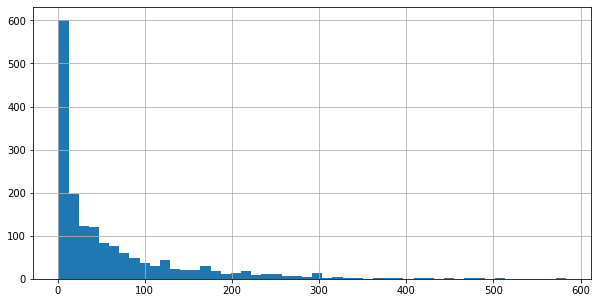

In [19]:
plt.figure(1,figsize=(10,5))
plt.hist(ratings_n['Number of ratings movie get'],bins=50)
plt.grid()
plt.show()

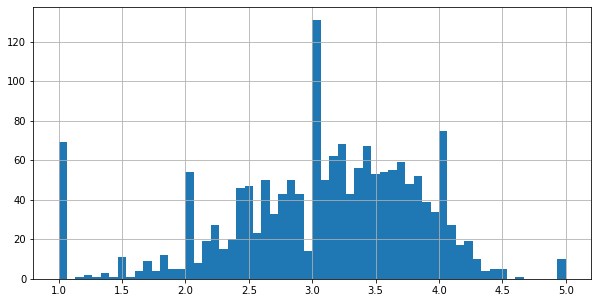

In [20]:
plt.figure(2,figsize=(10,5))
plt.hist(ratings_n['rating'],bins=60)
plt.grid()
plt.show()


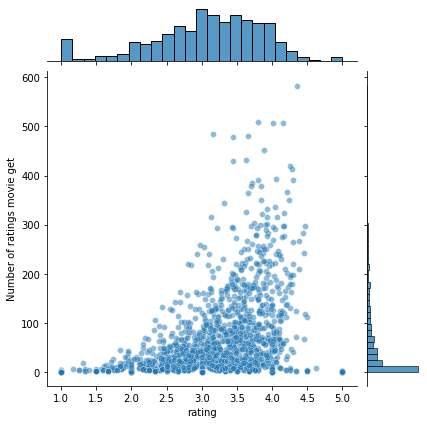

In [21]:
sn.jointplot(x='rating',y='Number of ratings movie get',data=ratings_n,alpha=0.5)
plt.show()

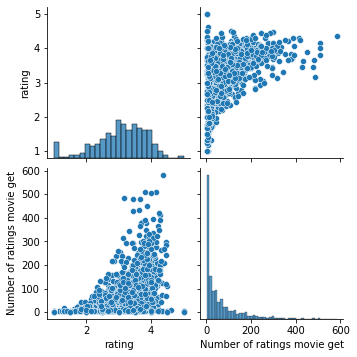

In [22]:
sn.pairplot(ratings_n,vars=['rating','Number of ratings movie get'])

In [23]:
df.head(2)

,user_id,item_id,rating,timestamp,Movie name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)


In [24]:
movie_mat=df.pivot_table(index='user_id',columns='Movie name',values='rating')

In [25]:
movie_mat

Movie name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
user_ratings=movie_mat['Star Wars (1977)']

In [27]:
user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [28]:
similar=movie_mat.corrwith(user_ratings)

In [29]:
newdata=pd.DataFrame(similar,columns=['correlation']).head()

In [30]:
newdata

,correlation
Movie name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [31]:
newdata.dropna(inplace=True)

In [32]:
newdata

,correlation
Movie name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [33]:
newdata.sort_values('correlation',ascending=False).head(10)

,correlation
Movie name,
'Til There Was You (1997),0.872872
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
1-900 (1994),-0.645497


In [34]:
corr_starwars=newdata.join(ratings_n['Number of ratings movie get'])

In [35]:
corr_starwars

,correlation,Number of ratings movie get
Movie name,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [36]:
corr_starwars[corr_starwars['Number of ratings movie get']>100].sort_values('correlation',ascending=False)

,correlation,Number of ratings movie get
Movie name,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125


In [37]:
def predict_movies(movie_name):
    movie_user_ratings=movie_mat[movie_name]
    similar_to_movie=movie_mat.corrwith(movie_user_ratings)
    
    newdata=pd.DataFrame(similar_to_movie,columns=['correlation'])
    newdata.dropna(inplace=True)
    
    corr_movie=newdata.join(ratings_n['Number of ratings movie get'])    
    predictions=corr_movie[corr_movie['Number of ratings movie get']>100].sort_values('correlation',ascending=False)
    
    return predictions

In [39]:
predictions=predict_movies('Titanic (1997)')
predictions.head(10)

,correlation,Number of ratings movie get
Movie name,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
"Last of the Mohicans, The (1992)",0.427239,128
Outbreak (1995),0.426237,104
Die Hard (1988),0.403124,243
